# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

,max_nw,active_workers_history,service_time_history,service_time_goal,emitter_elapsed_time_history,workers_elapsed_time_history,collector_elapsed_time_history
0,8,8,953,100,9,2118,2146
1,8,8,263,100,7,2134,11
2,8,4,45,100,214,173,158
3,8,2,51,100,21,189,32
4,8,2,99,100,14,198,5


### Service Time History

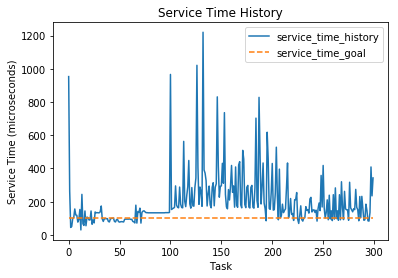

In [41]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'])
plt.ylabel('Service Time (microseconds)')
plt.xlabel('Task')
plt.title('Service Time History')
plt.show()

### Service Time Error

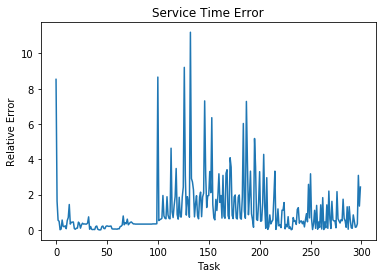

In [45]:
# plot relative error between  service_time_goal and service_time_history
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(abs_relative_error, label='absoulute')
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()

### Parallelism Degree

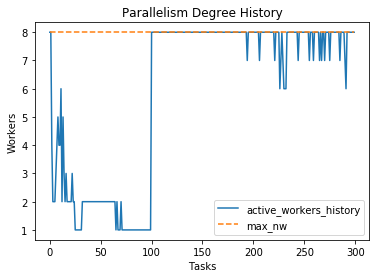

In [43]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', '--'])
plt.ylabel('Workers')
plt.xlabel('Tasks')
plt.title('Parallelism Degree History')
plt.show()

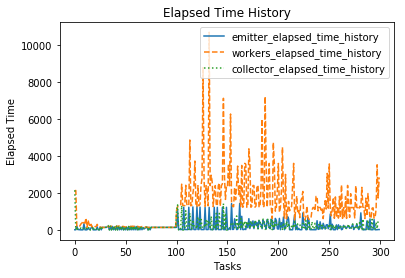

In [31]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [32]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

,nw,completion_time
0,1,173534
1,2,88070
2,3,67584
3,4,59161
4,5,59404


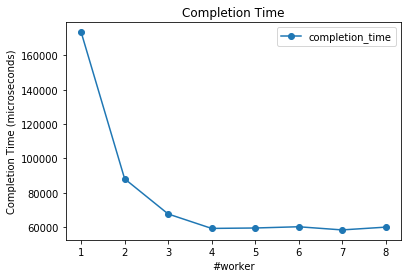

In [33]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-o')
plt.xlabel('#worker')
plt.ylabel('Completion Time (microseconds)')
plt.title('Completion Time')
plt.show()

### Scalability

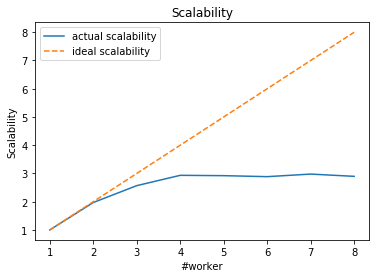

In [37]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability')
plt.plot(nw, nw, linestyle='--', label='ideal scalability')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Scalability')
plt.title('Scalability')
plt.show()

### Speedup

In [38]:
# speedup
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
sequential_time

,sequential_time
0,153968


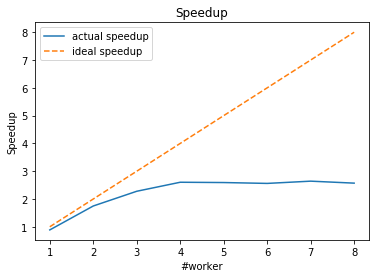

In [39]:
tseq = sequential_time['sequential_time']
speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup')
plt.plot(nw, nw, linestyle='--', label='ideal speedup')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Speedup')
plt.title('Speedup')
plt.show()

### Alpha

In [49]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv")
ts_vs_alpha_df

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,alpha,service_time_goal,service_time_history
0.0,100,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
0.1,100,[51,194,94,91,88,85,83,81,81,80,80,80,81,83,82,82,83,84,84,85,85,86,85,84,83,83,84,86,87,88,89,90,89,88,87,86,85,84,83,82,83,84,85,85,86,86,87,87,86,85,84,84,83,82,82,81,81,80,80,79,79,78,78,78,78,77,77,77,77,77,77,77,79,80,81,83,84,84,85,86,85,84,85,86,87,87,88,88,88,89,89,89,89,89,89,90,90,90,89,87,138,123,108,128,118,124,115,106,110,119,123,129,134,135,152,153,154,153,184,180,178,175,218,211,206,200,256,245,236,272,260,249,240,261,249,239,231,283,269,257,247,267,255,245,236,242,233,225,218,256,319,303,288,304,303,287,303,315,476,456,434,435,406,381,359,338,334,361,341,333,316,346,388,381,358,338,324,306,306,291,292,306,305,303,288,303,303,295,291,276,279,295,282,298,288,304,318,294,280,282,262,265,268,256,238,237,228,229,215,223,216,209,203,194,189,189,185,182,178,169,167,160,159,188,184,182,172,170,160,152,159,152,166,172,162,154,160,159,158,156,155,152,166,161,169,161,163,168,166,161,165,162,165,170,181,190,197,193,188,192,193,182,171,164,163,161,160,160,152,159,151,145,138,138,138,131,126,136,137,131,154,146,139,133,135,136,138,132,141,142,142,142,135,135,130,145,153,162,159,161,]
0.2,100,[97,176,78,94,86,79,113,107,103,100,95,90,85,81,77,74,144,142,139,136,133,131,130,129,128,127,128,127,126,137,141,137,134,132,130,129,128,127,126,125,125,124,124,124,124,124,124,124,124,124,124,130,135,139,136,133,133,131,129,128,134,138,135,133,131,130,129,128,127,126,126,125,124,124,124,124,124,124,124,124,124,130,129,128,127,126,126,125,132,138,149,144,140,137,134,132,130,129,128,127,298,145,146,118,109,106,115,116,122,128,150,150,150,168,182,175,170,184,177,171,185,177,172,185,178,172,185,196,186,179,190,182,175,188,180,174,187,179,192,184,194,185,177,194,186,179,204,224,241,230,244,281,310,318,322,326,329,329,297,271,248,297,298,270,247,294,364,418,365,353,343,330,298,297,323,292,268,273,280,260,240,224,330,353,341,428,403,443,419,365,381,336,300,255,263,271,277,237,219,212,200,227,221,247,213,224,209,198,208,310,287,260,242,220,192,180,212,185,184,188,193,214,204,178,184,193,199,220,211,199,209,218,254,270,234,203,193,184,177,159,144,145,146,131,121,128,132,134,198,181,173,161,172,182,162,173,159,151,165,205,192,184,178,179,168,165,147,133,151,146,147,147,135,138,140,142,147,135,134,138,140,142,130,134,137,125,128,147,142,131,135,138,141,134,124,130,164,161,144,161,]
0.3,100,[147,167,78,81,93,78,129,76,99,139,80,104,137,77,104,96,86,80,75,71,138,134,131,128,127,141,151,71,137,137,148,155,85,83,89,94,96,98,100,101,90,101,107,94,85,78,73,141,136,133,131,129,128,127,127,127,127,126,126,126,125,125,125,125,127,127,126,126,126,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,126,126,126,126,136,384,140,129,115,126,139,193,225,238,248,265,312,311,267,277,327,313,267,320,314,318,270,254,267,370,352,291,293,338,326,285,289,323,320,317,319,316,313,309,314,313,352,342,290,336,369,353,294,292,383,315,305,302,345,336,279,297,307,264,278,294,254,270,238,539,425,397,367,450,504,401,366,334,324,318,268,224,245,261,284,276,290,306,346,325,317,299,